In [82]:
# importing libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import math
import os
import matplotlib.pyplot as plt

# importing algorithms & data split feature
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# importing evaluation metrices for the model
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Problem Statement:- Objective is to predict the values for sepallengthcms using other independent variables.

# Data gathering

In [81]:
df = pd.read_excel(r'C:\Users\Akshay Mahajan\Desktop\Iris2.xlsx')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Data Analysis

In [83]:
df.shape

(150, 6)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [85]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [86]:
df.axes

[RangeIndex(start=0, stop=150, step=1),
 Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
        'Species'],
       dtype='object')]

In [87]:
df.Id

0        1
1        2
2        3
3        4
4        5
      ... 
145    146
146    147
147    148
148    149
149    150
Name: Id, Length: 150, dtype: int64

# Data Processing

In [88]:
df.drop('Id',axis=1,inplace=True)

In [89]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [90]:
df.select_dtypes('number')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [91]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [92]:
df['Species'].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)

In [93]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [95]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


<AxesSubplot:>

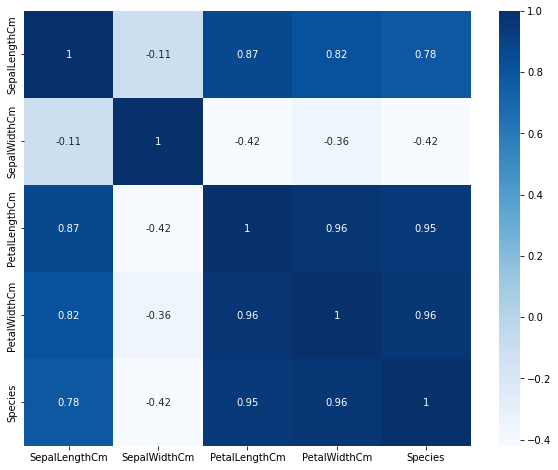

In [96]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
#plt.savefig('iris_corr.png')

In [97]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [98]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalLengthCm'>

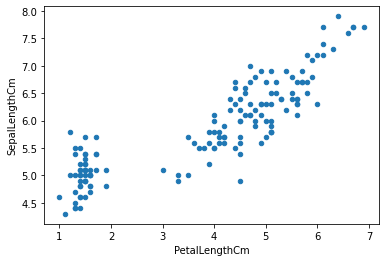

In [99]:
df.plot(x='PetalLengthCm',y='SepalLengthCm',kind='scatter')

<AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

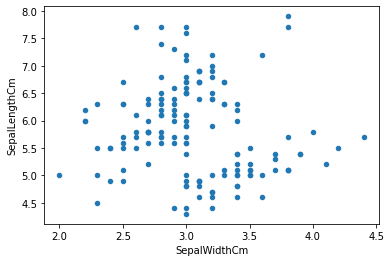

In [100]:
df.plot(x='SepalWidthCm',y='SepalLengthCm',kind='scatter')

<AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

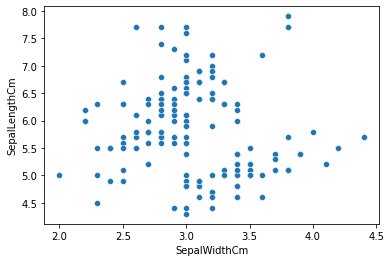

In [101]:
sns.scatterplot(data = df,x='SepalWidthCm',y='SepalLengthCm')

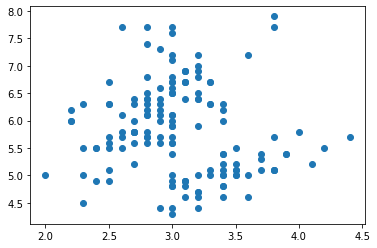

In [102]:
plt.scatter(data=df,x='SepalWidthCm',y='SepalLengthCm')

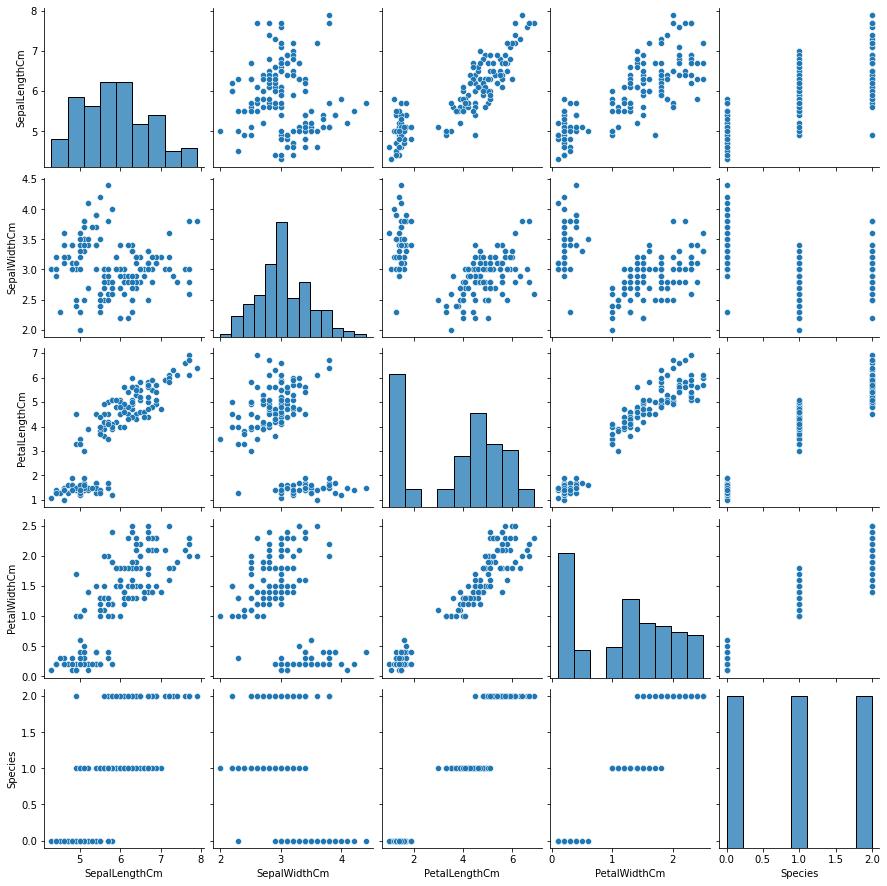

In [103]:
sns.pairplot(df)

In [104]:
df[df.duplicated()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,0
37,4.9,3.1,1.5,0.1,0
142,5.8,2.7,5.1,1.9,2


In [105]:
df.drop_duplicates(inplace=True)

In [106]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Spillting the data into independent & dependent variables

In [107]:
df.drop_duplicates(inplace=True)

In [108]:
x = df.drop('SepalLengthCm',axis=1)
y = df.SepalLengthCm

In [109]:
x

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,3.5,1.4,0.2,0
1,3.0,1.4,0.2,0
2,3.2,1.3,0.2,0
3,3.1,1.5,0.2,0
4,3.6,1.4,0.2,0
...,...,...,...,...
145,3.0,5.2,2.3,2
146,2.5,5.0,1.9,2
147,3.0,5.2,2.0,2
148,3.4,5.4,2.3,2


In [110]:
y

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLengthCm, Length: 147, dtype: float64

# hold out Validation

In [111]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [112]:
display(x_train,y_train)

,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
127,3.0,4.9,1.8,2
134,2.6,5.6,1.4,2
44,3.8,1.9,0.4,0
140,3.1,5.6,2.4,2
28,3.4,1.4,0.2,0
...,...,...,...,...
135,3.0,6.1,2.3,2
139,3.1,5.4,2.1,2
74,2.9,4.3,1.3,1
143,3.2,5.9,2.3,2


127    6.1
134    6.1
44     5.1
140    6.7
28     5.2
      ... 
135    7.7
139    6.9
74     6.4
143    6.8
39     5.1
Name: SepalLengthCm, Length: 117, dtype: float64

In [113]:
147*0.8

117.60000000000001



# Creating an instance of the model

In [114]:
Lr_model = LinearRegression()
Lr_model

LinearRegression()

## training model of training data

In [115]:
Lr_model.fit(x_train,y_train)

LinearRegression()

## prediciting output variable

In [34]:
y_pred = Lr_model.predict(x_test)
y_pred

array([6.12578102, 6.10700351, 6.50237691, 7.29475743, 6.91349042,
       6.50291721, 6.32185193, 6.16670634, 5.28512559, 6.0056541 ,
       5.34732552, 5.06491082, 5.12499904, 5.12103595, 5.0887188 ,
       5.38056835, 6.18064458, 4.93015043, 5.74416491, 4.89582699,
       5.89449727, 6.41783499, 4.91030553, 6.89098029, 6.26698837,
       5.18073878, 5.51787534, 6.51078066, 7.28081919, 6.7016794 ])

In [35]:
y_test

101    5.8
95     5.7
56     6.3
105    7.6
100    6.3
77     6.7
91     6.1
55     5.7
46     5.1
61     5.9
5      5.4
16     5.4
93     5.0
14     5.8
60     5.0
33     5.5
75     6.6
29     4.7
68     6.2
36     5.5
119    6.0
86     6.7
31     5.4
130    7.4
111    6.4
19     5.1
53     5.5
50     7.0
122    7.7
144    6.7
Name: SepalLengthCm, dtype: float64

In [36]:
Residuals = y_test-y_pred
Residuals

101   -0.325781
95    -0.407004
56    -0.202377
105    0.305243
100   -0.613490
77     0.197083
91    -0.221852
55    -0.466706
46    -0.185126
61    -0.105654
5      0.052674
16     0.335089
93    -0.124999
14     0.678964
60    -0.088719
33     0.119432
75     0.419355
29    -0.230150
68     0.455835
36     0.604173
119    0.105503
86     0.282165
31     0.489694
130    0.509020
111    0.133012
19    -0.080739
53    -0.017875
50     0.489219
122    0.419181
144   -0.001679
Name: SepalLengthCm, dtype: float64

# Evaluating the model

#### mse

In [37]:
mse = mean_squared_error(y_test,y_pred)
mse

0.11927583683461902

#### rmse

In [38]:
rmse = np.sqrt(mse)
rmse

0.3453633403165701

#### mae

In [39]:
mae = mean_absolute_error(y_test,y_pred)
mae

0.2889264515656188

### r2 score

In [44]:
r2 = r2_score(y_test,y_pred)
r2

0.8016330601833891

### adjuseted R2

In [45]:
Adj_R2 = 1-(((1-r2)*(df.shape[0]-1))/(df.shape[0]-df.shape[1]-1))
Adj_R2

0.79459877153741

### slopes of BFL

In [47]:
Lr_model.coef_

array([ 0.59162527,  0.70603674, -0.33783138, -0.20268601])

### intercept of BFL

In [50]:
Lr_model.intercept_

1.9748570733263366

# final model building on entire data

In [51]:
lr_final = LinearRegression()
lr_final.fit(x,y)
lr_final

LinearRegression()

In [54]:
y_pred_new = lr_final.predict(x_test)
r2_new = r2_score(y_test,y_pred_new)
r2_new

0.8121187824227138

In [55]:
Adj_R2_new = 1-(((1-r2_new)*(df.shape[0]-1))/(df.shape[0]-df.shape[1]-1))
Adj_R2_new

0.8054563278986966